# This is an example on applying function on the indexed column when performing group by.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])


people

,a,b,c,d,e
Joe,-1.026825,0.135611,-1.431972,1.679261,0.533745
Steve,0.593464,-0.055401,-0.440413,0.226776,-0.572570
Wes,-0.736882,-0.445811,0.094672,0.401659,1.202806
Jim,1.249190,-0.665378,1.588984,0.874319,1.326106
Travis,-1.092692,0.407420,-1.210875,0.636710,0.735420


In [2]:
def GroupFunc(x):
    if len(x) > 3:
        return 'Group1'
    else:
        return 'Group2'

people.groupby(GroupFunc).sum()

,a,b,c,d,e
Group1,-0.499228,0.352018,-1.651288,0.863486,0.162850
Group2,-0.514518,-0.975578,0.251684,2.955239,3.062657


In [3]:
people.groupby(people.a > 1)

In [4]:
people.groupby(people.a > 1).sum()

,a,b,c,d,e
a,,,,,
False,-2.262935,0.041818,-2.988588,2.944407,1.899401
True,1.249190,-0.665378,1.588984,0.874319,1.326106


In [5]:
def GroupColFunc(df, ind, col):
    if df[col].loc[ind] > 1:
        return 'Group1'
    else:
        return 'Group2'

In [6]:
people.groupby(lambda x: GroupColFunc(people, x, 'a')).sum()

,a,b,c,d,e
Group1,1.249190,-0.665378,1.588984,0.874319,1.326106
Group2,-2.262935,0.041818,-2.988588,2.944407,1.899401


# Exercise of group on Pandas tutorial

http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [7]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})


In [8]:
df

,A,B,C,D
0,foo,one,0.679489,-0.835520
1,bar,one,0.326837,-0.542299
2,foo,two,0.418586,-0.369519
3,bar,three,1.819455,1.328115
4,foo,two,0.296643,-1.474694
5,bar,two,-0.603106,2.153663
6,foo,one,-0.973265,0.073914
7,foo,three,-0.150041,0.370416


In [9]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [10]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


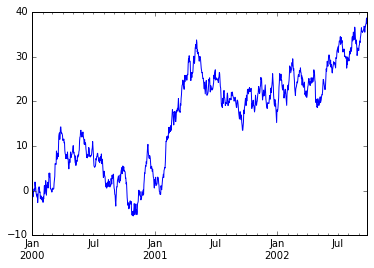

In [11]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
